<a href="https://colab.research.google.com/github/Nasser-Obeid/Gaussian-Difference/blob/main/Gausssian_difference_and_toon_shading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow

In [ ]:
def gaussianKernel(size, sigma):
    kernel = cv.getGaussianKernel(size, sigma)
    # turns the kernel to a 2d array
    kernel = np.outer(kernel, kernel)
    return kernel

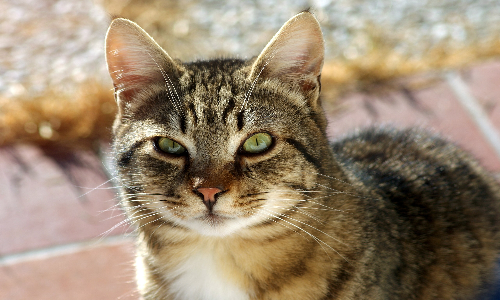

In [ ]:
img = cv.imread("/content/2560px-A-Cat.jpg")
img = cv.resize(img, (500, 300))
kernelSize = (15, 15)
cv2_imshow(img)

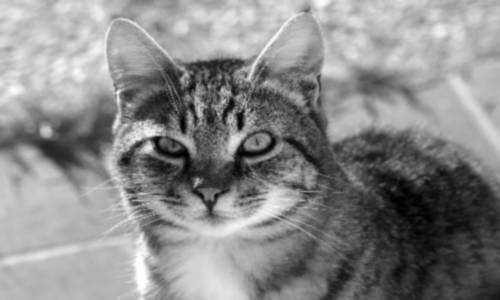

In [ ]:
blurr_1 = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
blurr_1 = cv.GaussianBlur(blurr_1, kernelSize, 0.8)
cv.waitKey(0)
cv2_imshow(blurr_1)

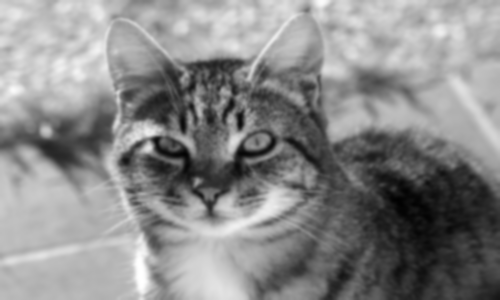

In [ ]:
blurr_2 = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
blurr_2 = cv.GaussianBlur(blurr_2, kernelSize, 1.4)
cv.waitKey(0)
cv2_imshow(blurr_2)

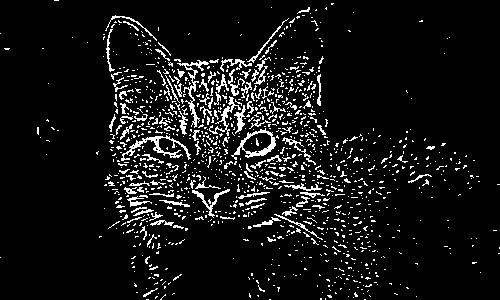

In [ ]:
difference = cv.subtract(blurr_2, blurr_1)
ret, difference = cv.threshold(difference, 4, 255, cv.THRESH_BINARY)
cv2_imshow(difference)

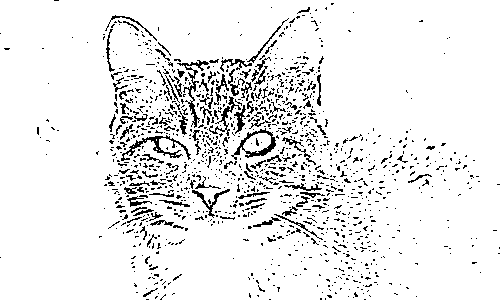

In [ ]:
mask = cv.subtract(blurr_2, blurr_1)
rep, mask = cv.threshold(mask,4,255,cv.THRESH_BINARY_INV)
cv2_imshow(mask)

In [ ]:
# color quantisation using K means clustring
def colorQuantisation(image, k):
    data = np.float32(image).reshape(-1, 3)

    criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 20, 1.0)

    ret, label, center = cv.kmeans(data, k, None, criteria, 100, cv.KMEANS_RANDOM_CENTERS)

    center = np.uint8(center)
    result = center[label.flatten()]
    result = result.reshape(img.shape)
    return result

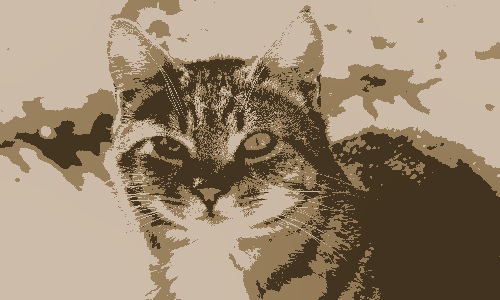

In [ ]:
colored = colorQuantisation(img, 3)
colored = cv.bilateralFilter(colored, 255, 75, 75)
cv2_imshow(colored)

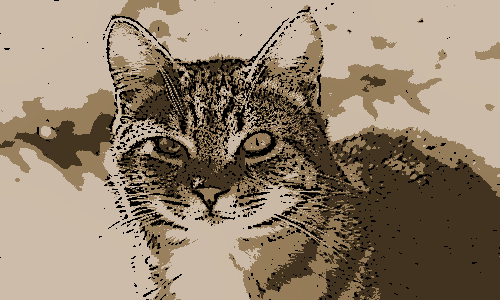

In [ ]:
toon = cv.bitwise_and(colored, colored, mask=mask)
cv2_imshow(toon)